In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
data = pd.read_csv("C:\\Users\\SHEQEY\\Desktop\\Failure of Liver\\Indian Liver Patient Dataset (ILPD).csv")

In [4]:
data.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
data.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [6]:
# checking the shape of the dataset
rows, columns = data.shape
print(f"This dataset has {rows} rows and {columns} columns")

This dataset has 583 rows and 11 columns


In [7]:
# checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
#checking for data types
data.dtypes

age                   int64
gender               object
tot_bilirubin       float64
direct_bilirubin    float64
tot_proteins          int64
albumin               int64
ag_ratio              int64
sgpt                float64
sgot                float64
alkphos             float64
is_patient            int64
dtype: object

In [9]:
# checking for null values
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [10]:
# Drop rows where 'alkphos' has null values, modifying 'data' in place
data.dropna(subset=['alkphos'], inplace=True)

# Check if the rows with null values are dropped
print(data.isnull().sum())


age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64


In [11]:
# checking duplicates
data.duplicated().any()

True

In [12]:
# removing of duplicates
data.drop_duplicates(inplace=True)

In [13]:
# checking duplicates
data.duplicated().any()

False

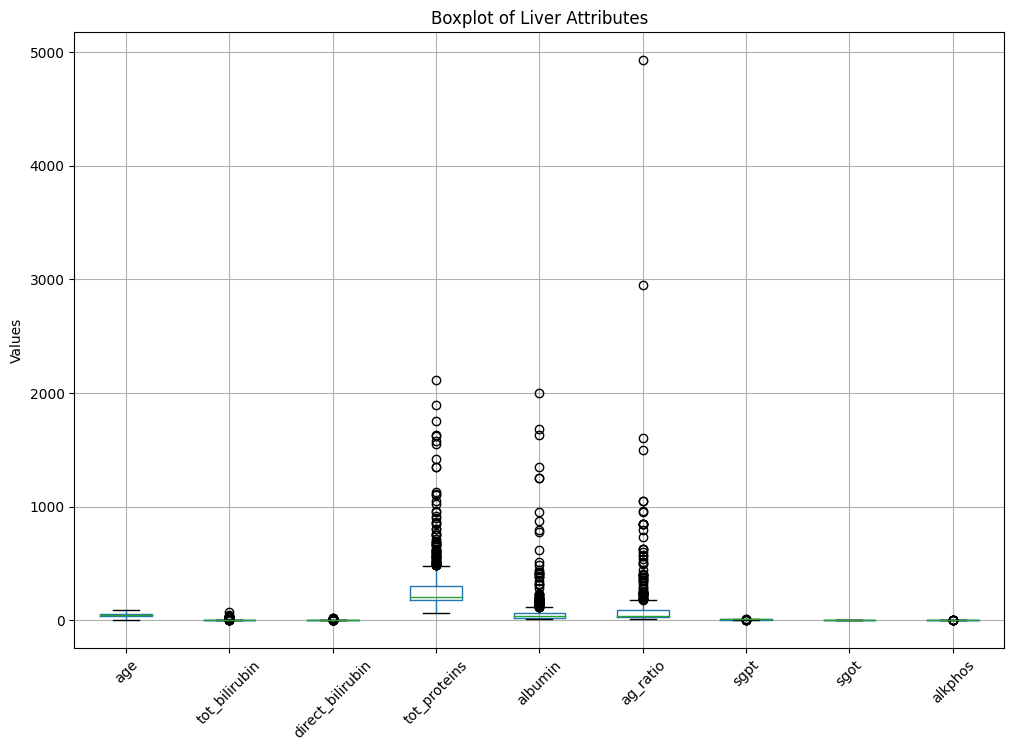

In [14]:
# Define columns to plot
columns_to_plot = ['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']

# Create a boxplot for each column
plt.figure(figsize=(12, 8))
data[columns_to_plot].boxplot()
plt.title('Boxplot of Liver Attributes')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.show()


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,566.0,44.886926,16.274893,4.0,33.0,45.00,58.00,90.0
tot_bilirubin,566.0,3.338869,6.286728,0.4,0.8,1.00,2.60,75.0
direct_bilirubin,566.0,1.505830,2.841485,0.1,0.2,0.30,1.30,19.7
tot_proteins,566.0,292.567138,245.936559,63.0,176.0,208.00,298.00,2110.0
albumin,566.0,80.143110,182.044881,10.0,23.0,35.00,60.75,2000.0
ag_ratio,566.0,109.892226,291.841897,10.0,25.0,41.00,87.00,4929.0
sgpt,566.0,6.494876,1.087512,2.7,5.8,6.60,7.20,9.6
sgot,566.0,3.145583,0.795745,0.9,2.6,3.10,3.80,5.5
alkphos,566.0,0.948004,0.319635,0.3,0.7,0.95,1.10,2.8
is_patient,566.0,1.286219,0.452393,1.0,1.0,1.00,2.00,2.0


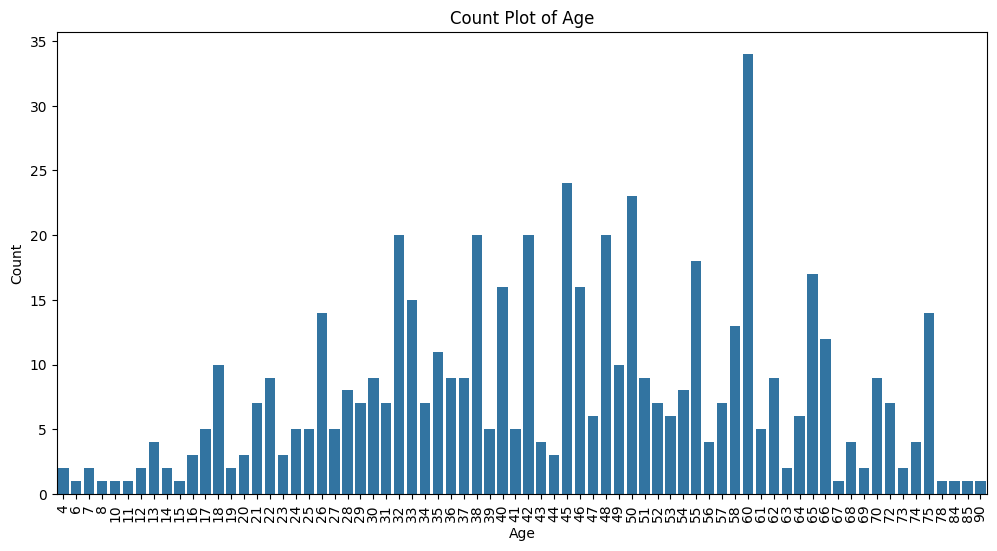

In [16]:
# Count plot for age variable
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=data)
plt.title('Count Plot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

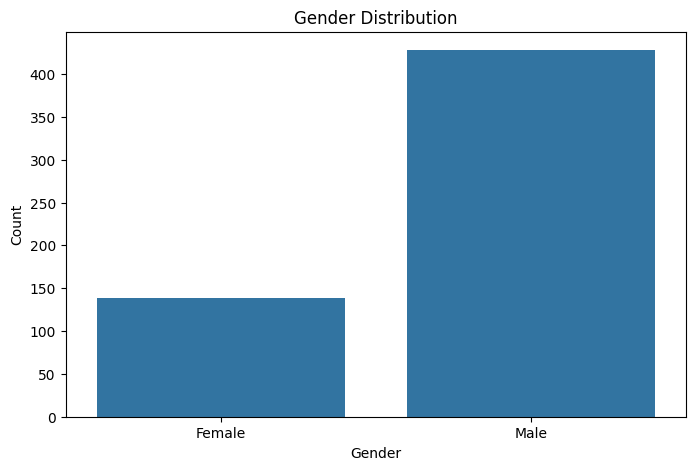

In [17]:
# Bar plot for gender variable
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


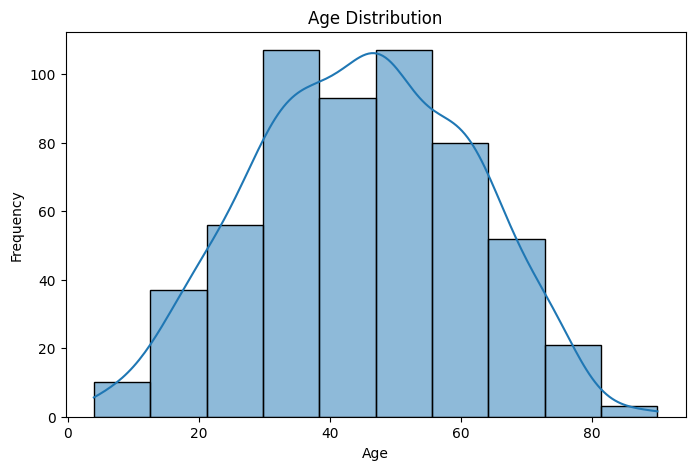

In [18]:
# Histogram for age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


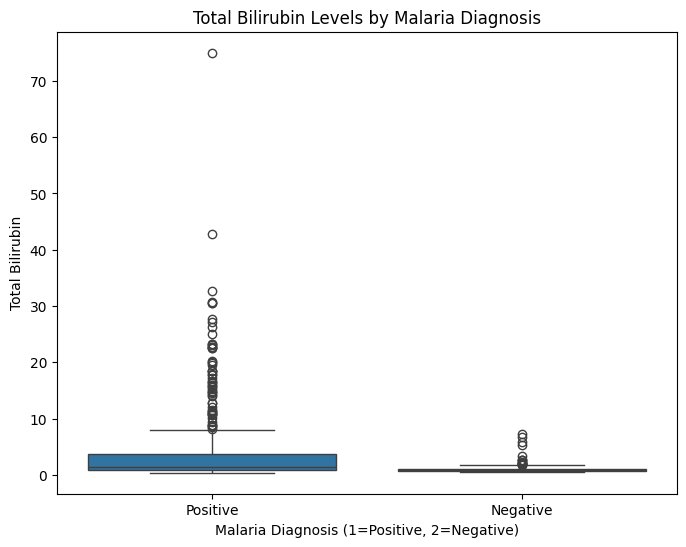

In [19]:
# Boxplot for tot_bilirubin by is_patient (malaria or non-malaria cases)
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_patient', y='tot_bilirubin', data=data)
plt.title('Total Bilirubin Levels by Malaria Diagnosis')
plt.xlabel('Malaria Diagnosis (1=Positive, 2=Negative)')
plt.ylabel('Total Bilirubin')
plt.xticks([0, 1], ['Positive', 'Negative'])  
plt.show()


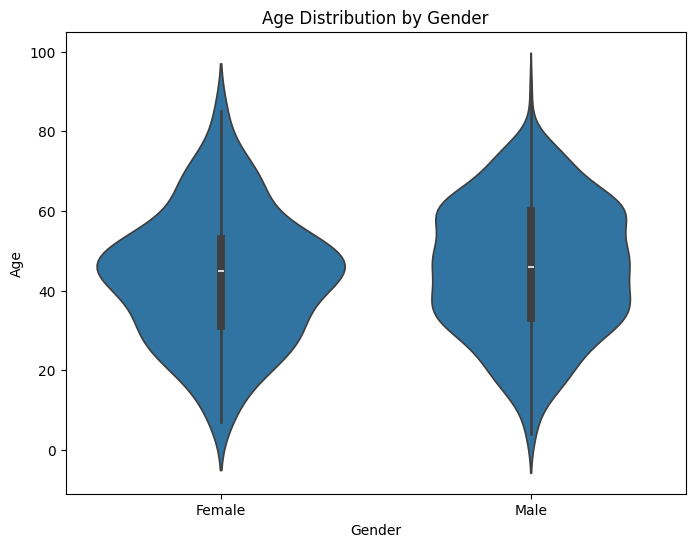

In [20]:
# Violin plot for age by gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='age', data=data)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


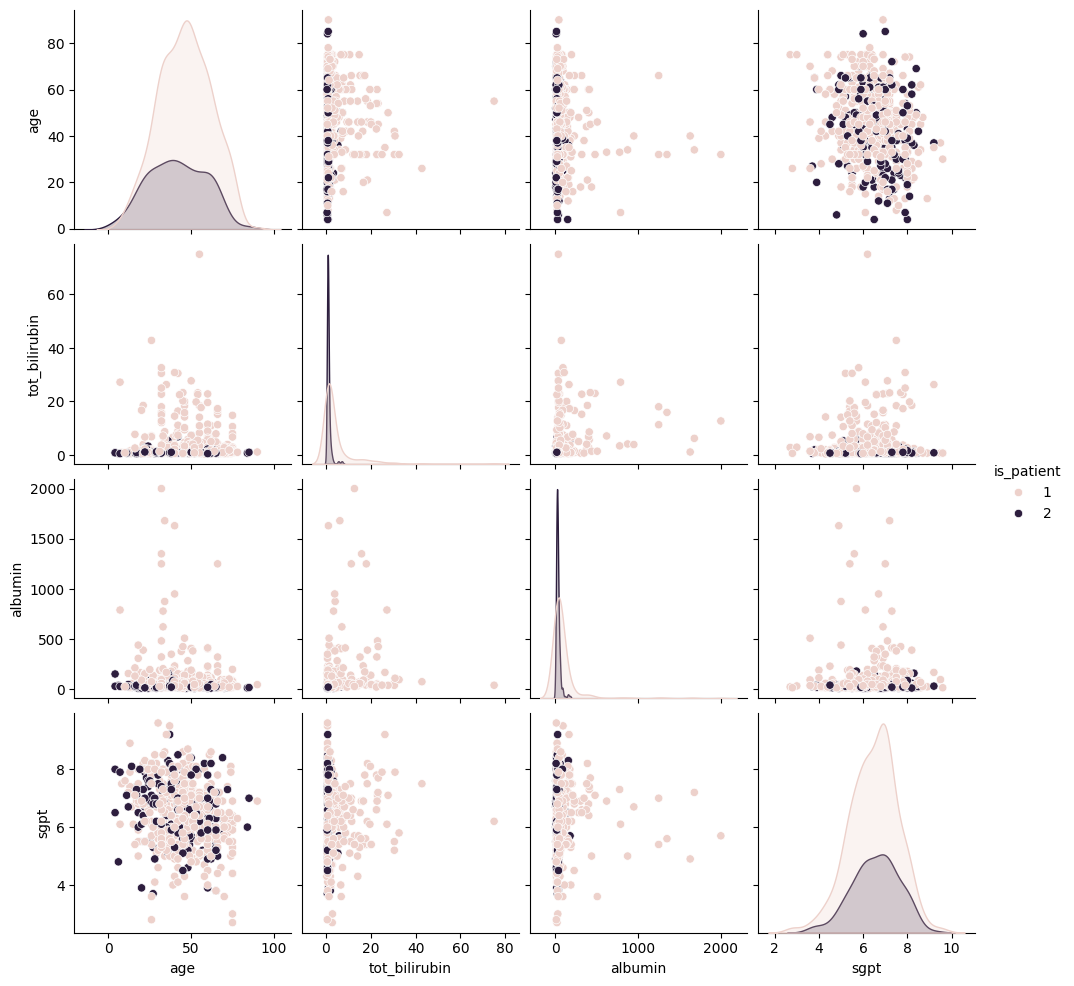

In [21]:
# Pairplot for multiple variables
sns.pairplot(data[['age', 'tot_bilirubin', 'albumin', 'sgpt', 'is_patient']], hue='is_patient')
plt.show()


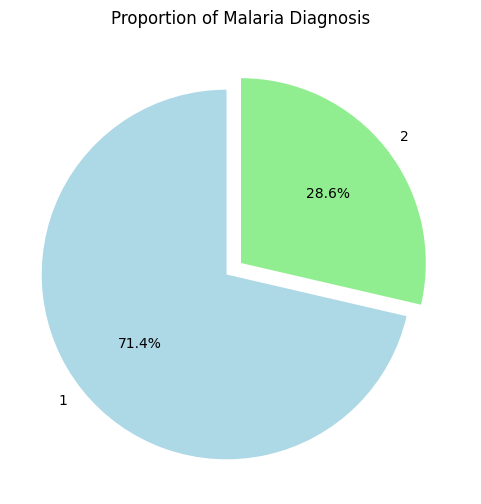

In [22]:
# Pie chart for malaria diagnosis
plt.figure(figsize=(6, 6))
data['is_patient'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], explode=[0.1, 0])
plt.title('Proportion of Malaria Diagnosis')
plt.ylabel('')  # Hide y-axis label
plt.show()


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Uncomment the line below if you need to load your dataset
# data = pd.read_csv('your_liver_dataset.csv')

# Check the columns in the dataset
print("Columns in the dataset:", data.columns)

# Inspect the first few rows of the dataset
print(data.head())

# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

# Convert categorical variables into numeric (for example, gender)
if 'gender' in data.columns:
    le = LabelEncoder()
    data['gender'] = le.fit_transform(data['gender'])
else:
    raise KeyError("The column 'gender' does not exist in the DataFrame.")

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['is_patient'])  # Exclude the target column
y = data['is_patient']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Columns in the dataset: Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')
   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   65  Female            0.7               0.1           187       16   
1   62    Male           10.9               5.5           699       64   
2   62    Male            7.3               4.1           490       60   
3   58    Male            1.0               0.4           182       14   
4   72    Male            3.9               2.0           195       27   

   ag_ratio  sgpt  sgot  alkphos  is_patient  
0        18   6.8   3.3     0.90           1  
1       100   7.5   3.2     0.74           1  
2        68   7.0   3.3     0.89           1  
3        20   6.8   3.4     1.00           1  
4        59   7.3   2.4     0.40           1  
Accuracy: 0.6228070175438597

Classification Report:
              precision  

In [24]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['is_patient'])  # Exclude the target column
y = data['is_patient']  # Target column

# Adjust the test_size here (e.g., 0.1 for 10% test data)
test_size = 0.1  # Change this value to whatever you prefer (e.g., 0.2 or 0.3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Note: Model saving code has been removed.


Random Forest Classifier Accuracy: 0.7017543859649122

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.85      0.80        40
           2       0.50      0.35      0.41        17

    accuracy                           0.70        57
   macro avg       0.63      0.60      0.61        57
weighted avg       0.68      0.70      0.68        57


Confusion Matrix:
[[34  6]
 [11  6]]


In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate model
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))


Accuracy: 0.6140350877192983
Confusion Matrix:
 [[31  9]
 [13  4]]
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.78      0.74        40
           2       0.31      0.24      0.27        17

    accuracy                           0.61        57
   macro avg       0.51      0.51      0.50        57
weighted avg       0.59      0.61      0.60        57



In [26]:
import os
import pickle

# Ensure the 'models' directory exists in the current working directory
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model and feature names
model_path = 'models/best_rf_model.pkl'  # Update with your desired model name
with open(model_path, 'wb') as file:
    pickle.dump((rf_model, X.columns), file)  # Use your model variable here (rf_model)

print("Model and feature names saved successfully!")


Model and feature names saved successfully!


In [31]:
import os
import pickle

# Define the model path
model_path = 'models/best_rf_model.pkl'  # Update with your saved model path

# Check if the model file exists
if os.path.exists(model_path):
    # Load the model and feature names
    with open(model_path, 'rb') as file:
        loaded_model, feature_names = pickle.load(file)
    print("Model and feature names loaded successfully!")
else:
    print("Model file not found. Please check the model path.")


Model and feature names loaded successfully!
